# Simple data exploration

In this notebook we will explore a bit a dataset from an article by a team at autodesk (which I link to below).
We can think of this as simple data exploration you might do when you first start working with a new dataset.

First, we will load pandas and numpy, and read the comma-separated-value (CSV) file into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 6,6

In [2]:
df = pd.read_csv("./assets/DatasaurusDozen-long.csv")
df

,x,y,label
0,32.331110,61.411101,away
1,53.421463,26.186880,away
2,63.920202,30.832194,away
3,70.289506,82.533649,away
4,34.118830,45.734551,away
...,...,...,...
1841,34.794594,13.969683,x_shape
1842,79.221764,22.094591,x_shape
1843,36.030880,93.121733,x_shape
1844,34.499558,86.609985,x_shape


From the webpage where I found the dataset, I know that really this dataframe has merged 13 sub-datasets that are labeled by the collumn `label`. 

```{admonition} Take action
:class: important
Let's check to see what the unique values for the `label` are.
```

In [3]:
df["label"].unique()

array(['away', 'bullseye', 'circle', 'dino', 'dots', 'h_lines',
       'high_lines', 'slant_down', 'slant_up', 'star', 'v_lines',
       'wide_lines', 'x_shape'], dtype=object)

```{admonition} Take action
:class: important

Let's check the mean and covariance for `x` and `y` for the `label='dots'`. 
```

We will use the [selection by callable](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-callable) functionality in pandas. 


In [4]:
selector = lambda df: df['label'] =='dino'
df.loc[selector].cov()

,x,y
x,281.069988,-29.113933
y,-29.113933,725.515961


In [5]:
df.loc[selector].mean()

x    54.263273
y    47.832253
dtype: float64

```{admonition} Take action
:class: important

Now let's check the covariance between `x` and `y` grouped by all the labels
```

In [6]:
df.groupby('label').cov()

x           y
label                               
away       x  281.227029  -28.971572
           y  -28.971572  725.749775
bullseye   x  281.207393  -30.979902
           y  -30.979902  725.533372
circle     x  280.898024  -30.846620
           y  -30.846620  725.226844
dino       x  281.069988  -29.113933
           y  -29.113933  725.515961
dots       x  281.156953  -27.247681
           y  -27.247681  725.235215
h_lines    x  281.095333  -27.874816
           y  -27.874816  725.756931
high_lines x  281.122364  -30.943012
           y  -30.943012  725.763490
slant_down x  281.124206  -31.153399
           y  -31.153399  725.553749
slant_up   x  281.194420  -30.992806
           y  -30.992806  725.688605
star       x  281.197993  -28.432772
           y  -28.432772  725.239695
v_lines    x  281.231512  -31.371608
           y  -31.371608  725.638809
wide_lines x  281.232887  -30.075267
           y  -30.075267  725.650560
x_shape    x  281.231481  -29.618418
           y  -29.618418  725.224991

In [7]:
df.groupby('label').mean()

,x,y
label,,
away,54.266100,47.834721
bullseye,54.268730,47.830823
circle,54.267320,47.837717
dino,54.263273,47.832253
dots,54.260303,47.839829
h_lines,54.261442,47.830252
high_lines,54.268805,47.835450
slant_down,54.267849,47.835896
slant_up,54.265882,47.831496


Ok, great, so we know the mean and the covariance for the data in the `dots` sub-dataset.

## Visualize the data

```{admonition} Stop and think
:class: attention
What do you think the data looks like? 
```

Maybe you think it looks like a 2-d Gaussian, that's reasoanble since all we know is the mean and the covariance. 

```{admonition} Take action
:class: important
Let's make a synthetic dataset with that mean and covariance.
```

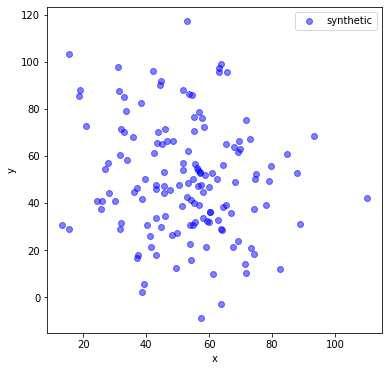

In [8]:
# convert mean and cov to a numpy array:
np_mean = df.loc[lambda df: df['label'] =='dino', :].mean().to_numpy()
np_cov = df.loc[lambda df: df['label'] =='dino', :].cov().to_numpy()
# generate some synthetic data
n_to_generate = df.loc[selector,'label'].count()
norm_data = np.random.multivariate_normal(mean=np_mean, cov=np_cov,size=n_to_generate)
#df.loc[lambda df: df['label'] =='dots', :].plot('x','y',kind='scatter', c='red', alpha=.5,label='dino')
plt.scatter(norm_data[:,0],norm_data[:,1], c='blue', alpha=.5, label='synthetic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

```{admonition} Take action
:class: important

Let's compare the synthetic dataset with the actual data
```

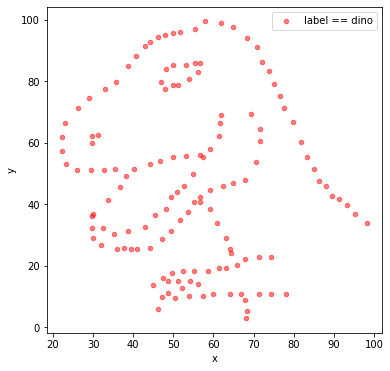

In [9]:
df.loc[lambda df: df['label'] =='dino', :].plot('x','y',kind='scatter', c='red', alpha=.5,label='label == dino')
#plt.scatter(norm_data[:,0],norm_data[:,1], c='blue', alpha=.5, label='synthetic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The synthetic data and the real data don't look similar at all. The mean and covariance aren't telling us the full story

```{hint} 
Visualizing your data is a good idea, simple summary statistics don't tell the full story.
```

```{admonition} Take action
:class: important

Let's make a scatter plot grouped by the `label` for the sub-dataset.
```

label
away          AxesSubplot(0.125,0.125;0.775x0.755)
bullseye      AxesSubplot(0.125,0.125;0.775x0.755)
circle        AxesSubplot(0.125,0.125;0.775x0.755)
dino          AxesSubplot(0.125,0.125;0.775x0.755)
dots          AxesSubplot(0.125,0.125;0.775x0.755)
h_lines       AxesSubplot(0.125,0.125;0.775x0.755)
high_lines    AxesSubplot(0.125,0.125;0.775x0.755)
slant_down    AxesSubplot(0.125,0.125;0.775x0.755)
slant_up      AxesSubplot(0.125,0.125;0.775x0.755)
star          AxesSubplot(0.125,0.125;0.775x0.755)
v_lines       AxesSubplot(0.125,0.125;0.775x0.755)
wide_lines    AxesSubplot(0.125,0.125;0.775x0.755)
x_shape       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

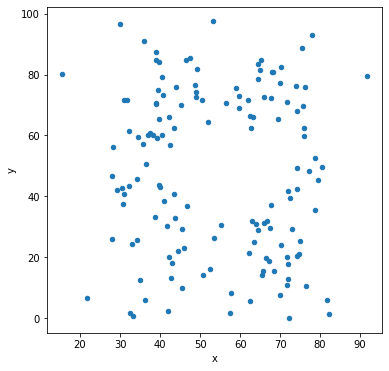

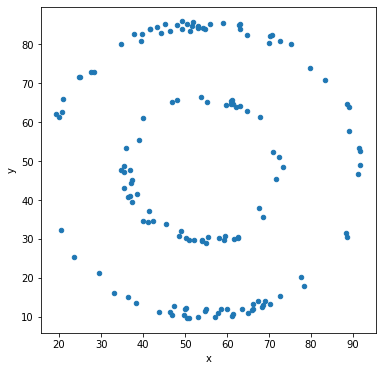

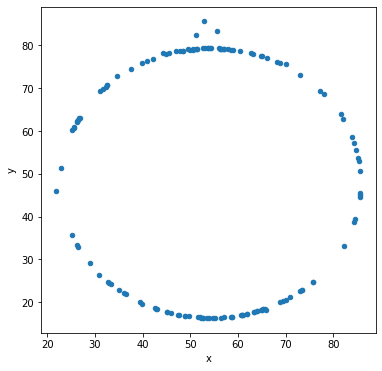

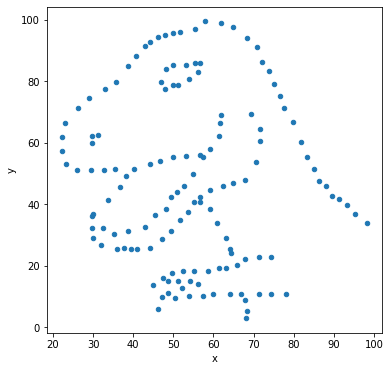

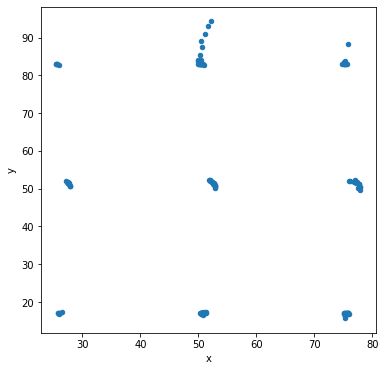

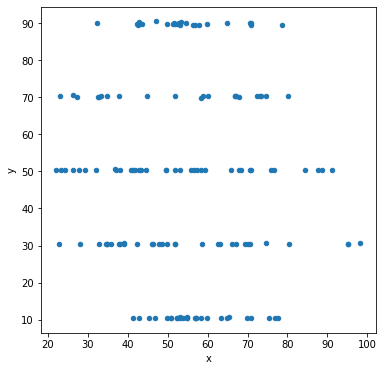

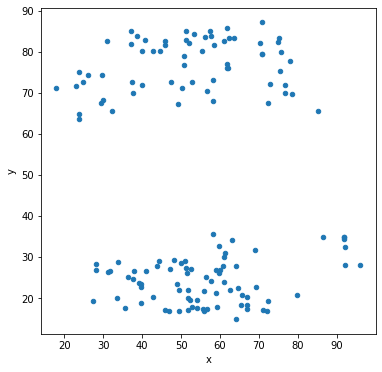

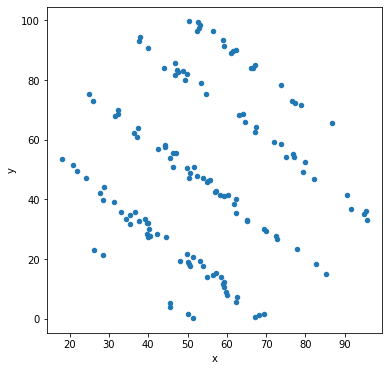

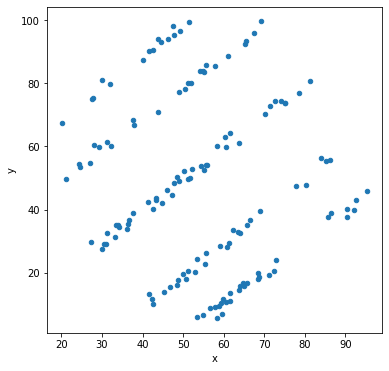

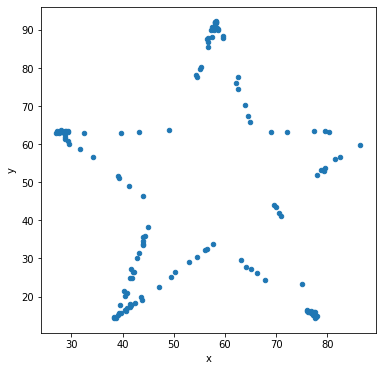

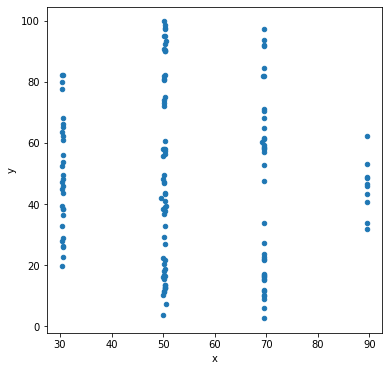

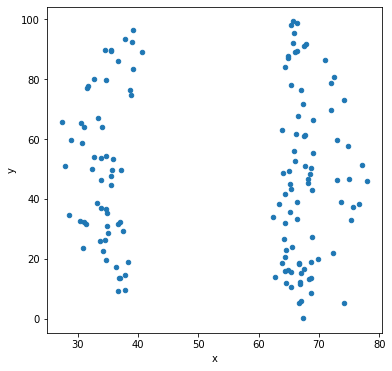

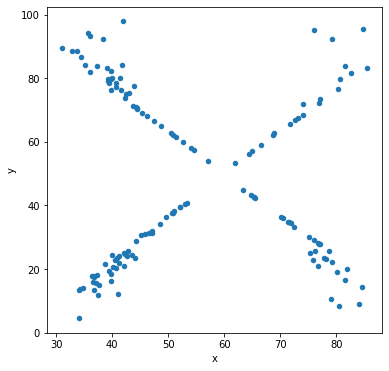

In [10]:
df.groupby('label').plot('x','y',kind='scatter')

We can also use the `seaborn` library to make [violin plots](https://en.wikipedia.org/wiki/Violin_plot), which reveal more about the different sub-datasets.

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

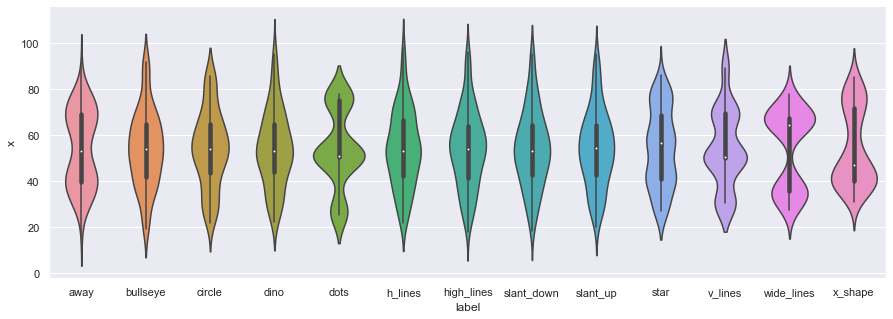

In [12]:
ax = sns.violinplot(x="label",y="x", data=df)
#fig = plt.gcf()
#fig.set_size_inches(15, 5)

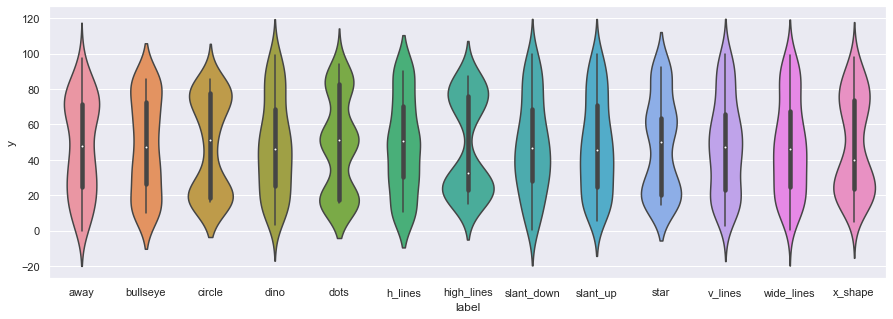

In [13]:
ax = sns.violinplot(x="label",y="y", data=df,figsize=(15,5))

## Final thoughts

The data set above comes from [this post by Autodesk research](https://www.autodeskresearch.com/publications/samestats):

``` Justin Matejka, George Fitzmaurice (2017)
 Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing
 CHI 2017 Conference proceedings:
 ACM SIGCHI Conference on Human Factors in Computing Systems
```

It was inspired by this tweet from Alberto Cairo:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Don&#39;t trust summary statistics. Always visualize your data first <a href="https://t.co/63RxirsTuY">https://t.co/63RxirsTuY</a> <a href="https://t.co/5j94Dw9UAf">pic.twitter.com/5j94Dw9UAf</a></p>&mdash; Alberto Cairo (@AlbertoCairo) <a href="https://twitter.com/AlbertoCairo/status/765167969139765250?ref_src=twsrc%5Etfw">August 15, 2016</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

A more well-known example is known as [Anscombe Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

<!-- <img src="https://commons.wikimedia.org/wiki/File:Anscombe.svg" /> -->

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/500px-Anscombe%27s_quartet_3.svg.png" width="80%" />



This wikipedia article on [Correlation and Dependence](http://en.wikipedia.org/wiki/Correlation_and_dependence) is also great -- each of the collumns has the same correlation coefficient.

<p><a href="https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg#/media/File:Correlation_examples2.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/500px-Correlation_examples2.svg.png" width="80%" alt="Correlation examples2.svg">
</a></p>


Finally, here's a cool tool for quickly making a csv dataset: [Draw my data](http://robertgrantstats.co.uk/drawmydata.html) 

And finally, here's a short video from Autodesk:


<iframe width="560" height="315" src="https://www.youtube.com/embed/DbJyPELmhJc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>